# **CVPS22 // Sliding Window Object Detector**

*November 29, 2022*

This notebook introduces the concept of a sliding window detector, using a CNN as the feature extractor and classifier for each window.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from tensorflow import keras
from PIL import Image as im
# from scipy.stats import randint
import os
import rasterio
from rasterio.plot import show

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
pip install imagecodecs

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
import imageio.v2 as imageio

In [6]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [7]:
# Load the CSV file as a NumPy array
Crops = np.genfromtxt('G:/Other computers/My Laptop/NEW/Spring 2022/Projects/Spectral Unmixing/SWI_Project/EPICollect5 data/Manan/For_Pinki/NeuralNet_Unmixing/Revised_Polygons_Feb/Crops.csv', delimiter=',', names=None)
Bare_Soil = np.genfromtxt('G:/Other computers/My Laptop/NEW/Spring 2022/Projects/Spectral Unmixing/SWI_Project/EPICollect5 data/Manan/For_Pinki/NeuralNet_Unmixing/Revised_Polygons_Feb/BareSoil.csv', delimiter=',')
Marsh = np.genfromtxt('G:/Other computers/My Laptop/NEW/Spring 2022/Projects/Spectral Unmixing/SWI_Project/EPICollect5 data/Manan/For_Pinki/NeuralNet_Unmixing/Revised_Polygons_Feb/Marsh.csv', delimiter=',')
Water = np.genfromtxt('G:/Other computers/My Laptop/NEW/Spring 2022/Projects/Spectral Unmixing/SWI_Project/EPICollect5 data/Manan/For_Pinki/NeuralNet_Unmixing/Revised_Polygons_Feb/Water.csv', delimiter=',')
Salt = np.genfromtxt('G:/Other computers/My Laptop/NEW/Spring 2022/Projects/Spectral Unmixing/SWI_Project/EPICollect5 data/Manan/For_Pinki/NeuralNet_Unmixing/Revised_Polygons_Feb/Salt.csv', delimiter=',')


In [8]:
# -- Removing the header from all the columns.
Crops = np.delete(Crops, 0, axis=0)
Bare_Soil = np.delete(Bare_Soil, 0, axis=0)
Marsh = np.delete(Marsh, 0, axis=0)
Water = np.delete(Water, 0, axis=0)
Salt = np.delete(Salt, 0, axis=0)

# Print the shape of the array
print(Crops.shape)
print(Bare_Soil.shape)
print(Marsh.shape)
print(Water.shape)
print(Salt.shape)

(5198, 12)
(1096, 12)
(773, 12)
(20131, 12)
(239, 12)


In [9]:
# Taking random rows from the training data set
n = Salt.shape[0]

np.random.seed(66)

# Generate a fixed random permutation of the indices
indices= np.random.permutation(Crops.shape[0])

# Extract the first 290 rows using the random indexing
Crops_random_rows = Crops[indices[:5*n], :]

# Generate a fixed random permutation of the indices
indices= np.random.permutation(Bare_Soil.shape[0])
# Extract the first 290 rows using the random indexing
Bare_Soil_random_rows = Bare_Soil[indices[:4*n], :]

# Generate a fixed random permutation of the indices
indices= np.random.permutation(Marsh.shape[0])
# Extract the first 290 rows using the random indexing
Marsh_random_rows = Marsh[indices[:3*n], :]

# Generate a fixed random permutation of the indices
indices= np.random.permutation(Water.shape[0])
# Extract the first 290 rows using the random indexing
Water_random_rows = Water[indices[:4*n], :]

# -- creating testing array
feat = np.concatenate((Crops_random_rows, Bare_Soil_random_rows,Marsh_random_rows, Water_random_rows, Salt))

feat_norm = feat

# -- creating target array
targ = np.concatenate((np.full(5*n, 'Crops'), np.full(4*n, 'Bare_Soil'), np.full(3*n, 'Marsh'), 
                       np.full(4*n, 'Water'), np.full(n, 'Salt')))

In [10]:
from sklearn.model_selection import cross_val_score, KFold

In [11]:
model = RandomForestClassifier(class_weight="balanced_subsample")
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold_scores = cross_val_score(model, feat, targ, cv=kf)

# Print the accuracy scores for each fold
for fold, score in enumerate(fold_scores):
    print(f"Fold {fold + 1} Accuracy: {score}")

Fold 1 Accuracy: 0.996309963099631
Fold 2 Accuracy: 0.998769987699877
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.9963054187192119
Fold 5 Accuracy: 1.0


In [12]:
# Calculate the mean accuracy across all folds
mean_accuracy = fold_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.998277073903744


number of training examples : 3250
number of testing examples  : 813
training accuracy : 1.0
testing accuracy : 1.0
              precision    recall  f1-score   support

   Bare_Soil       1.00      1.00      1.00       184
       Crops       1.00      1.00      1.00       229
       Marsh       1.00      1.00      1.00       142
        Salt       1.00      1.00      1.00        50
       Water       1.00      1.00      1.00       208

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

[0.08633019 0.07614234 0.10013487 0.03612682 0.0309182  0.08043705
 0.08735307 0.12633498 0.15167273 0.01742458 0.12966921 0.07745598]
number of training examples : 3250
number of testing examples  : 813
training accuracy : 1.0
testing accuracy : 0.998769987699877
              precision    recall  f1-score   support

   Bare_Soil       0.99      1.00      1.00       174
       Crops       1.

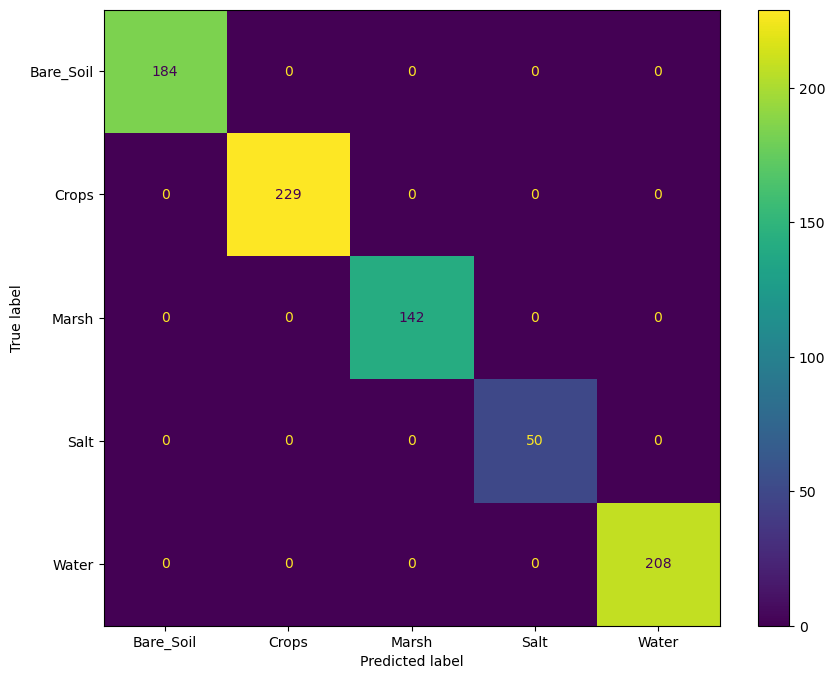

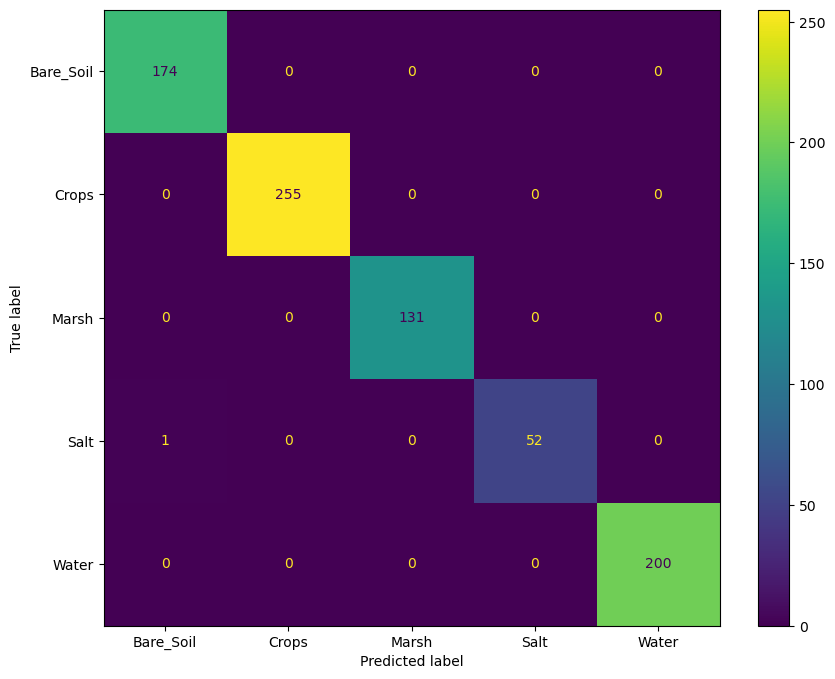

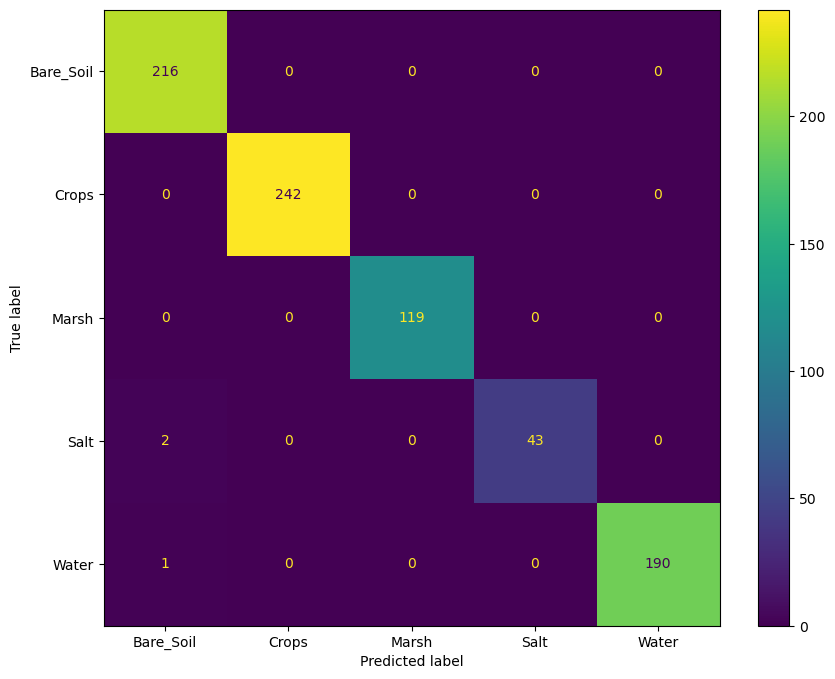

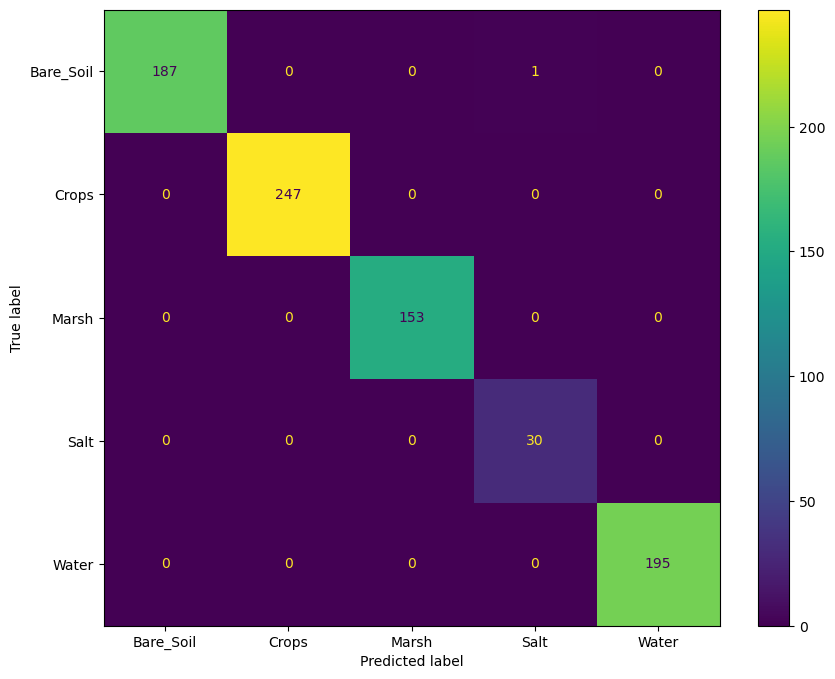

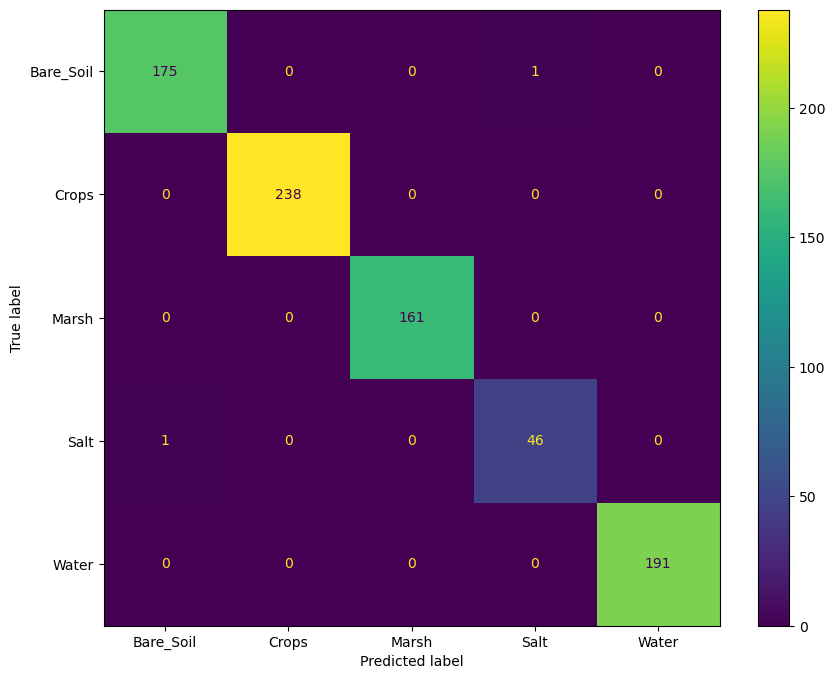

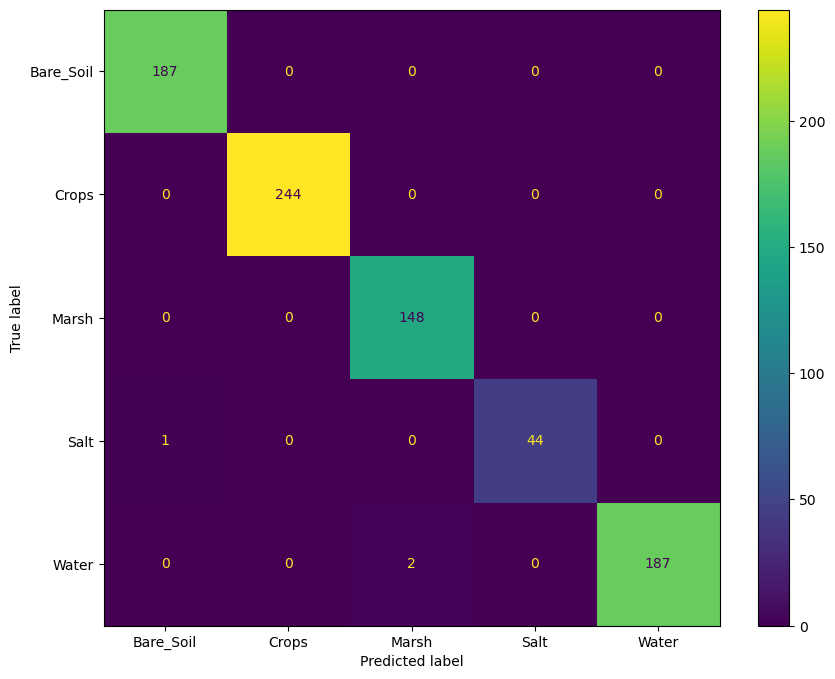

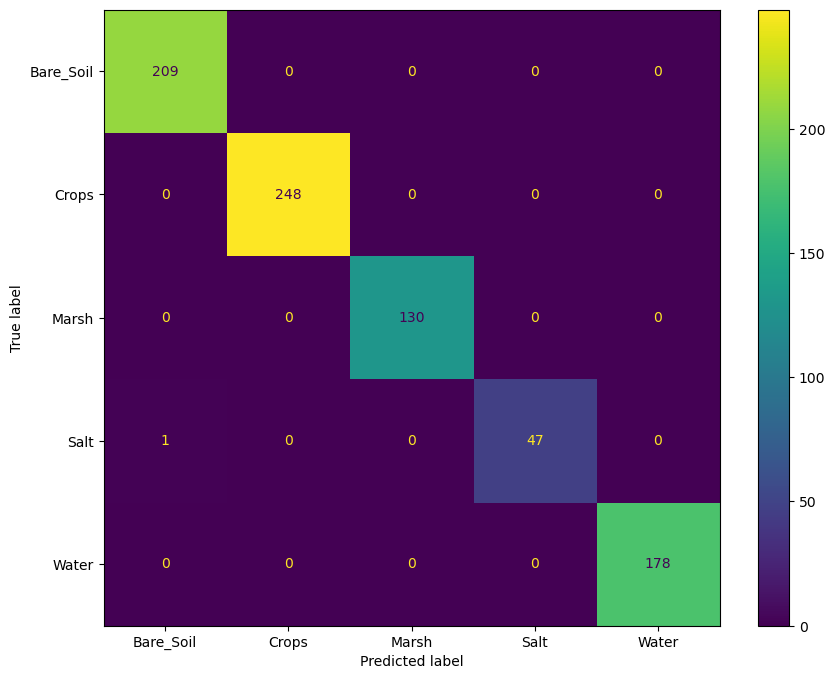

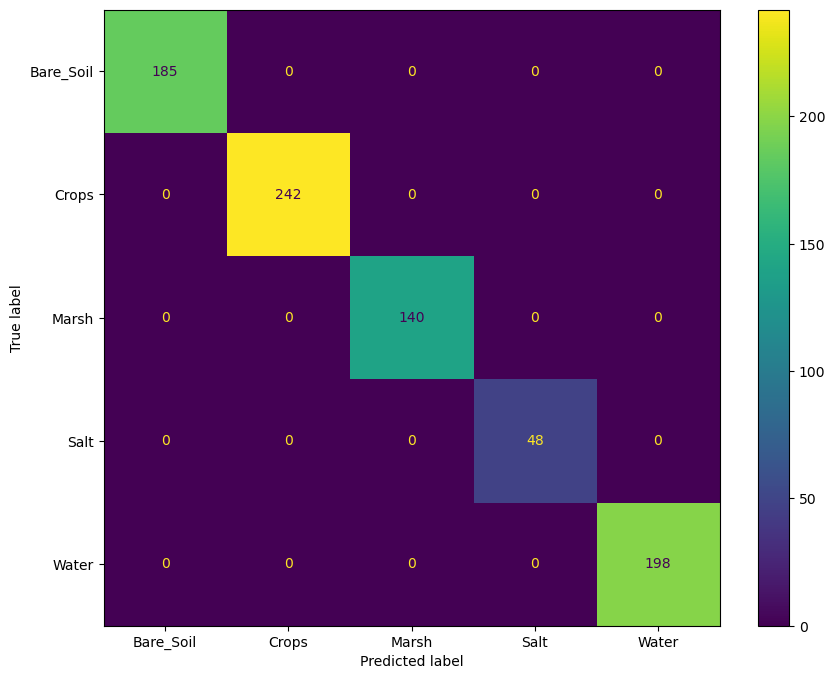

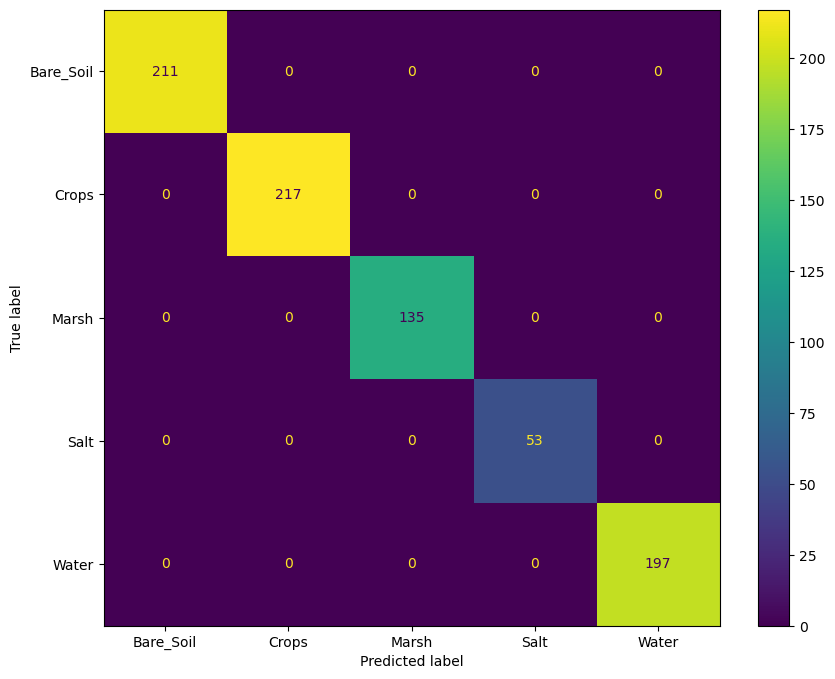

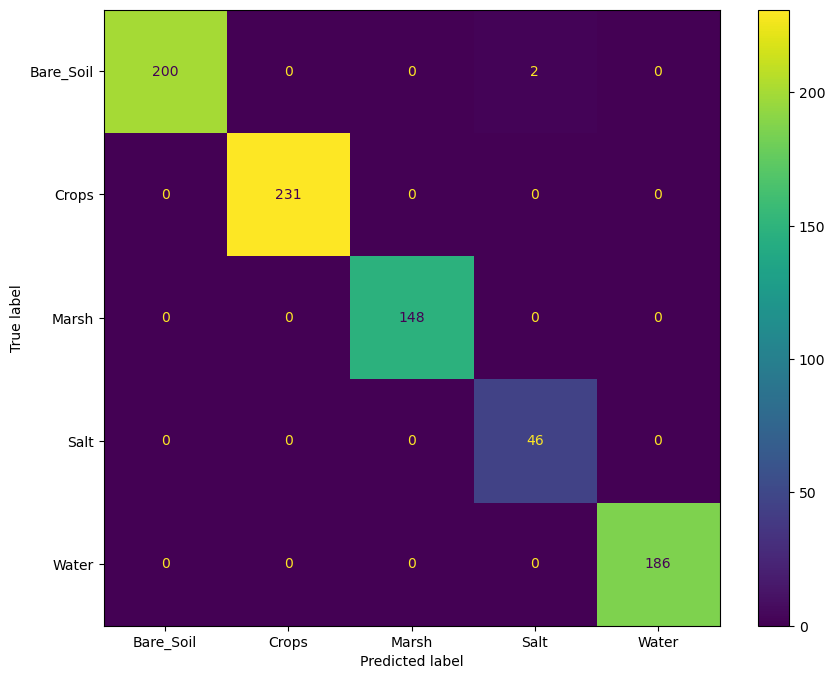

In [15]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Define the number of times to train the model
num_iterations = 10

# Create a list to store the trained models
trained_models = []

# Perform training and saving models
for _ in range(num_iterations):
    
    # -- create a training/testing sample. We define the random state parameter here to quantify model structure uncertainty
    feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_norm, targ, test_size=0.2, random_state=42, stratify=targ)

    print("number of training examples : {0}".format(targ_tr.size))
    print("number of testing examples  : {0}".format(targ_te.size))

    
    # Instantiate the Random Forest Classifier model, random state not defined to have different model strucutre
    model = RandomForestClassifier(class_weight="balanced_subsample")
    
    # Fit the model to the training data
    model.fit(feat_tr, targ_tr)
    
    # Save the trained model
    trained_models.append(model)
    joblib.dump(model, "G:/My Drive/Neural_SpectralUnmixing/RandomForestModles_UncertaintyAnalysis/ModelUncertainty/Salt/SaltModel_Uncertainty" + str(len(trained_models)).zfill(2) + ".joblib")
    
    # -- predict the training and testing sets
    pred_tr = model.predict(feat_tr)
    pred_te = model.predict(feat_te)

    # -- print the accuracy on the training and testing set
    acc_tr = accuracy_score(targ_tr, pred_tr)
    acc_te = accuracy_score(targ_te, pred_te)

    print("training accuracy : {0}".format(acc_tr))
    print("testing accuracy : {0}".format(acc_te))
    print(classification_report(targ_te, pred_te))
    ConfusionMatrixDisplay.from_estimator(model, feat_te,targ_te)
    importances = model.feature_importances_
    print(importances)


In [22]:
file_addresses = [
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000000000-0000000000.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000000000-0000009472.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000009472-0000000000.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000009472-0000009472.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000018944-0000000000.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000018944-0000009472.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000028416-0000000000.tif",
    "G:/My Drive/Neural_SpectralUnmixing/NDVI_MaxApproach/NDVI_Max_Uncropped/NDVI_Max_Uncropped-0000028416-0000009472.tif"
    ]

In [23]:
    
# Apply the 10 models on an image for spectral unmixing
for i in range(len(file_addresses)):
    fname = file_addresses[i]
    
    data = np.asarray(imageio.imread(fname))
    norm = np.copy(data)
    norm = np.ma.array(data, mask=np.isnan(data))
    norm[np.isnan(norm)] = -99999

    norm_reshaped = norm.reshape(norm.shape[0]*norm.shape[1], norm.shape[2])
    
    # Create arrays to store predictions from the 10 models
    pred_imgs = []
    
    for model in trained_models:
        # Predict using each trained model
        predict_proba_img = model.predict_proba(norm_reshaped)
        predict_proba_img_reshaped = predict_proba_img.reshape(norm.shape[0],norm.shape[1],5)
        Spectrally_Unmixed_Salt = im.fromarray(predict_proba_img_reshaped[:,:,3])
        arra = np.array(Spectrally_Unmixed_Salt) 
        arr = arra.reshape(arra.shape[0],arra.shape[1],1)
        pred_imgs.append(arr)
    
    # Compute mean and standard deviation of the pixel values from the 10 models
    mean_img = np.mean(pred_imgs, axis=0)
    std_img = np.std(pred_imgs, axis=0)
    #mean_img = mean_img.reshape(1, mean_img.shape[0], mean_img.shape[1])
    #std_img = std_img.reshape(1, std_img.shape[0], std_img.shape[1])

    with rasterio.open (fname) as src:
      img = src.read()
      meta = src.meta.copy()

    crs = meta["crs"]
    transform = meta["transform"]

    # Save the output raster with mean and standard deviation bands
    output_fname = "G:/My Drive/Neural_SpectralUnmixing/RandomForestModles_UncertaintyAnalysis/ModelUncertainty/Salt/Salt_2022_StDev"  + str(i+1).zfill(10) + ".tif"      
    with rasterio.open(output_fname, "w", driver="GTiff", height=std_img.shape[0], width=std_img.shape[1], count=1, dtype=arr.dtype, crs=crs, transform=transform) as dst:
            dst.write(np.moveaxis(std_img, [2], [0]))

    output_fname = "G:/My Drive/Neural_SpectralUnmixing/RandomForestModles_UncertaintyAnalysis/ModelUncertainty/Salt/Salt_2022_Mean"  + str(i+1).zfill(10) + ".tif"
    with rasterio.open(output_fname, "w", driver="GTiff", height=std_img.shape[0], width=std_img.shape[1], count=1, dtype=arr.dtype, crs=crs, transform=transform) as dst:
            dst.write(np.moveaxis(mean_img, [2], [0]))

In [ ]:
#NICHE KA SAB TRIAL TIME PASS HAI